# Exercise 07 Clustering I

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

## Part 1. K-Means Clustering

This part we will perform clustering on a customer dataset provided by a mall. You can find the `Mall_Customers.csv` on the Learn platform. The goal is to explore if there are natural clusters in the customers that can be considered as different customer profiles and inform the marketing strategies of the mall

### Load the dataset

Download the `Mall_Customers.csv` and load it.

In [2]:
# load dataset
df = pd.read_csv('Mall Customers.csv')

### Explore the dataset

The goal of clustering is to discover the hidden sturcture in the dataset. Therefore, understanding the dataset is critical to set the clustering algorithm and interpret the clustering results.

We can explore the dataset to obtain the basic information and descriptive statistics. It's also important to understand the interactions between different features.

Based on the exploration, we may find clues to determine whether to:
- Delete some of the features
- Perform feature scaling
- Eliminate outliers
- ...

In [3]:
# display the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are 5 columns in the dataset.

Except for the 'Gener' column, which is a categorical varialbe, the other 4 columns are numerics variables.

In [4]:
# display the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 200 instances in the dataset.

There is no missing values.

In [5]:
# display the descriptive statistics of numeric variables
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The scales of different features are similar.

The 'CustomerID' seems to be a unique ID for each customer, ranging from 1 to 200.

It might not be a good feature for clustering, since we cannot assess the similarity between two customers based on their IDs, unless the 'CustomerID' carries other useful information.

In [6]:
# display the correlation matrix between numeric variables
corr = df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


There is no strong correlation among 'Age', 'Annual Income', and 'Spending Score'.

However, the correlation coefficient between 'CustomerID' and 'Annual Income' is close to 1.

It seems that the mall assigns IDs based on the customer's annual income level.

We can check this assumption by creating a scatter polt between 'CustomerID' and 'Annual Income'.

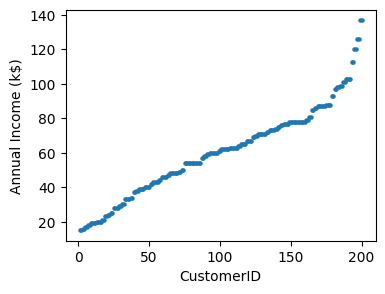

In [7]:
# display the scatter plot of 'CustomerID' vs ' Annual Income'
df.plot.scatter(
    x = 'CustomerID',
    y = 'Annual Income (k$)',
    figsize = (4, 3),
    marker = '.'
)
plt.show()

Our assumption is correct. In such case, 'CustomerID' can be useful for clustering, but we can use 'Annual Income' as the input feature directly.

So it's better to eliminate the 'CustomerID' column from the inputs to clustering altorithms, or assign the 'CustomerID' column as the index of the `DataFrame`.

Gender is a categorical variable, which divides the dataset into two natural clusters. However, to better understand the customers, simply clustering the customers into two groups based on gender is not enough.

There are two potential directions we can proceed to explore the hidden pattern in the dataset:
1. Perform clustering for each gender respectively to see if there are natural clusters within each gender.
2. Perform clustering on the entire dataset to see if there are natural clusters regardless gender.

Which direction to choose depends on whether 'Age', 'Annual Income', and 'Spending Score' differ for different genders.

We can check whether this difference exists by creating [boxplots](https://en.wikipedia.org/wiki/Box_plot) of 'Age', 'Annual Income', and 'Spending Score' by gender.

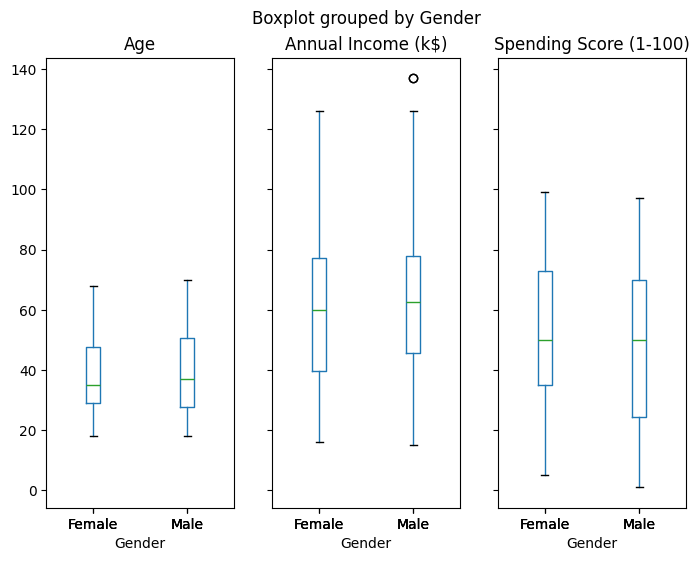

In [8]:
# display the boxplot of 'Age', 'Annual Income', 'Spending Score' by gender
df.boxplot(
    column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    by = 'Gender',
    grid = False,
    figsize = (8, 6),
    layout = (1, 3)
)
plt.show()

The boxplots show that there are no significant differences in the distributions of 'Age', 'Annual Income', and 'Spending Score' between different genders.

But the interaction between these three features may differ between genders.

We can check whether this difference exists by creating pair-wise scatter plots between these three features by gender.

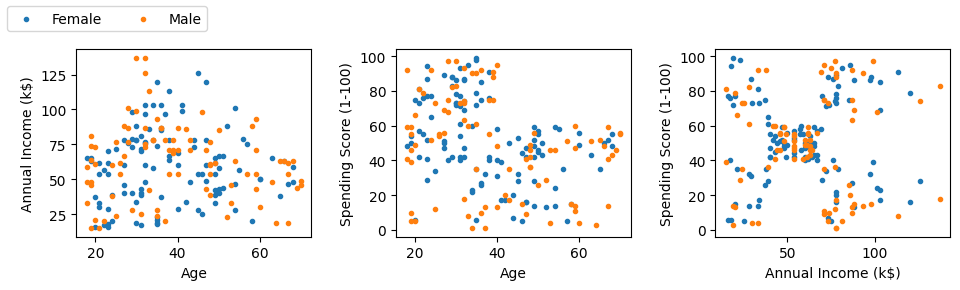

In [9]:
# display pair-wise scatter plots by gender
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
fig.tight_layout(pad = 3)
# scatter plot 'Age' vs 'Annual Income' by gender
axs[0].scatter(
    df[df['Gender'] == 'Female']['Age'],
    df[df['Gender'] == 'Female']['Annual Income (k$)'],
    marker = '.',
    label = 'Female'
)
axs[0].scatter(
    df[df['Gender'] == 'Male']['Age'],
    df[df['Gender'] == 'Male']['Annual Income (k$)'],
    marker = '.',
    label = 'Female'
)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Annual Income (k$)')
# scatter plot 'Age' vs 'Spending Score' by gender
axs[1].scatter(
    df[df['Gender'] == 'Female']['Age'],
    df[df['Gender'] == 'Female']['Spending Score (1-100)'],
    marker = '.',
    label = 'Female'
)
axs[1].scatter(
    df[df['Gender'] == 'Male']['Age'],
    df[df['Gender'] == 'Male']['Spending Score (1-100)'],
    marker = '.',
    label = 'Female'
)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Spending Score (1-100)')
# scatter plot 'Annual Income' vs 'Spending Score' by gender
axs[2].scatter(
    df[df['Gender'] == 'Female']['Annual Income (k$)'],
    df[df['Gender'] == 'Female']['Spending Score (1-100)'],
    marker = '.',
    label = 'Female'
)
axs[2].scatter(
    df[df['Gender'] == 'Male']['Annual Income (k$)'],
    df[df['Gender'] == 'Male']['Spending Score (1-100)'],
    marker = '.',
    label = 'Female'
)
axs[2].set_xlabel('Annual Income (k$)')
axs[2].set_ylabel('Spending Score (1-100)')
fig.legend(['Female', 'Male'], loc = 'upper left', ncol = 2)
plt.show()

The pair-wise scatter plots show that there are no significant differences in feature interactions between different genders.

So it is ok to eliminate the 'Gender' column from the dataset before clustering to see if there are natural clusters regardless gender.

In addition, from the scatter plot we can find that the distribution of data points is relatively convex and isotropic. So we can directly apply K-Means clustering without feature scaling.

### Data pre-processing

Based on the conclusions we got after exploring the dataset, we need to:
- Convert 'CustomerID' to the index of the `DataFrame`
- Delete 'Gender' from the dataset

In [10]:
# set 'CustomerID' as the index of the DataFrame
df.set_index(['CustomerID'], inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
# eliminate 'Gender' from the dataset
df.drop(columns = ['Gender'], inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


### K-Means clustering

After preprocessing, we can using K-Means algorithm to perform clustering. We need to specify the number of clusters we need. We can start with the default value (K = 10).

In [12]:
# K-Means clustering
X = df.values
model = KMeans(
    n_clusters = 10, # 10 clusters
    n_init = 'auto', # multiple attempt with different initial centroids
    random_state = 1, # fix ramdom state to guarantee reproducibility
    verbose = 1 # output log
)
model.fit(X)

Initialization complete
Iteration 0, inertia 61978.0.
Iteration 1, inertia 47464.74685112125.
Iteration 2, inertia 45127.46160420298.
Iteration 3, inertia 44515.8088286649.
Iteration 4, inertia 44208.400201077915.
Iteration 5, inertia 44067.3170249295.
Iteration 6, inertia 43964.11687286273.
Iteration 7, inertia 43898.835949997716.
Converged at iteration 7: strict convergence.


KMeans(n_clusters=10, random_state=1, verbose=1)

In [13]:
# obtain the cluster centers
model.cluster_centers_

array([[ 56.15555556,  53.37777778,  49.08888889],
       [ 47.84615385,  88.38461538,  25.46153846],
       [ 26.33333333,  26.66666667,  93.66666667],
       [ 32.69230769,  86.53846154,  82.12820513],
       [ 33.3       ,  22.5       ,  26.3       ],
       [ 27.        ,  56.77777778,  49.36111111],
       [ 25.23529412,  26.17647059,  73.23529412],
       [ 54.        ,  27.54545455,  13.36363636],
       [ 38.66666667, 117.        ,  18.33333333],
       [ 36.94117647,  76.88235294,  11.35294118]])

In [14]:
# obtain clustering results
model.labels_

array([4, 6, 4, 6, 4, 6, 4, 2, 7, 6, 7, 2, 7, 6, 4, 6, 4, 6, 7, 2, 4, 6,
       7, 6, 7, 6, 4, 6, 4, 2, 7, 6, 7, 2, 7, 6, 7, 6, 4, 6, 0, 2, 0, 6,
       7, 6, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 3, 9, 3, 1, 3, 9, 3, 9, 3,
       5, 3, 9, 3, 9, 3, 9, 3, 9, 3, 5, 3, 9, 3, 1, 3, 9, 3, 9, 3, 9, 3,
       9, 3, 9, 3, 9, 3, 1, 3, 9, 3, 1, 3, 1, 3, 1, 3, 9, 3, 9, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 8, 3, 8, 3, 8, 3, 8, 3, 8, 3,
       8, 3], dtype=int32)

In [15]:
# obtain the inertia
model.inertia_

43898.835949997716

### Select K value through Elbow method

Different values of K will lead to different results. Without any prior knowledge, it is difficult to assume a proper K value. We can use Elbow method to select K value based on a specified metric.

`sklearn` use inertia as the default criteria to determine when the model converge. We can also use inertia to select the value of K.

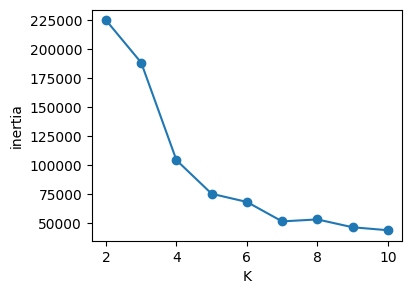

In [16]:
# create an empty list to store inertia
inertia =[]

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    inertia.append(model.inertia_)

# plot k vs inertia
plt.figure(figsize = (4, 3))
plt.plot(range(2, 11), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

The figure shows that the inertia decreases as k increases.

However, instead of having a sharp elbow, we got a gentle curve. The location of the elbow point is not clear.

In such cases, identifying the elbow point is more of an art than a science, which can be subjective.

One option is to use another metric to see if there is a clearer elbow point.

Let's try Silhouette Coefficient, Calinski-Harabasz Index and Davies-Bouldin Index

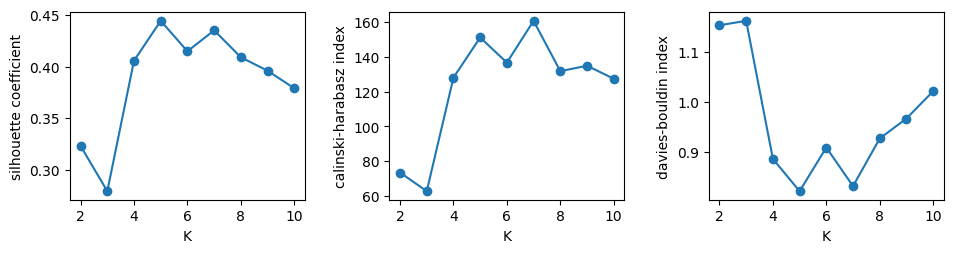

In [17]:
# create an empty list to store silhouette coefficient
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model.labels_))

# plot k vs silhouette coefficient
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
fig.tight_layout(pad = 3)
axs[0].plot(range(2, 11), silhouette, marker = 'o')
axs[0].set_xlabel('K')
axs[0].set_ylabel('silhouette coefficient')
axs[1].plot(range(2, 11), calinski_harabasz, marker = 'o')
axs[1].set_xlabel('K')
axs[1].set_ylabel('calinski-harabasz index')
axs[2].plot(range(2, 11), davies_bouldin, marker = 'o')
axs[2].set_xlabel('K')
axs[2].set_ylabel('davies-bouldin index')
plt.show()

Considering the four metrics, 5 or 7 is a more appropriate value for K. Let's take 5 as the K value.

In [18]:
# reconstruct the clustering model with k=5
model = KMeans(
    n_clusters = 5,
    n_init = 'auto',
    random_state = 1,
    verbose = 1
)
model.fit(X)

Initialization complete
Iteration 0, inertia 99940.0.
Iteration 1, inertia 76093.11637552694.
Iteration 2, inertia 75404.36291062372.
Iteration 3, inertia 75350.77917248776.
Converged at iteration 3: strict convergence.


KMeans(n_clusters=5, random_state=1, verbose=1)

### Interpret the results

After we got the clustering results, the most important step is to try to interpret the results.

To understand these natural clusters, the easiest way is to visualize the results.

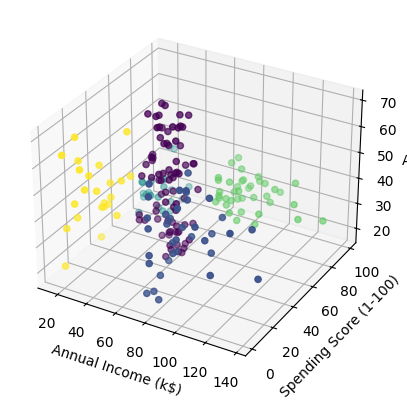

In [19]:
# create a 3D scatter plot to visualize the clustering results
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_proj_type('persp')
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c = model.labels_)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show()

Now we have 5 clusters, the clustering results seem to make sense in the visualization.

We can regard these clusters as different customer profiles, and develop targeted marketing strategies.

However, if there are more than 3 features, it would be impossible to create a 3D visualization.

In such cases, we need to have a close look at the distributions of different features in each cluster. This can also help us understand the clusters we got.

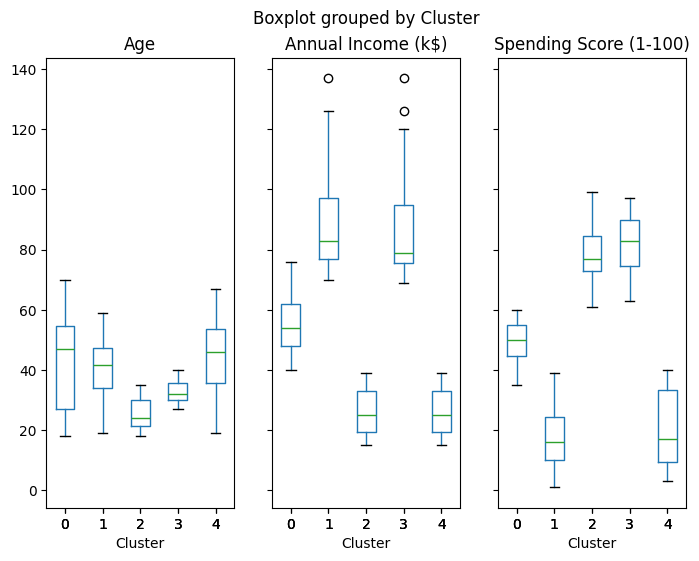

In [20]:
# display the boxplot of 'Age', 'Annual Income', 'Spending Score' by cluster
labeled_df = df.copy()
labeled_df['Cluster'] = model.labels_
labeled_df.boxplot(
    column = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    by = 'Cluster',
    grid = False,
    figsize = (8, 6),
    layout = (1, 3)
)
plt.show()

We can try to characterize the customer profiles represented by each cluster based on the above boxplot:

- Cluster 0: across all ages, median annual income, median spending score
- Cluster 1: around 35 to 50 years old, high annual income, low spending score
- Cluster 2: around 20 to 30 years old, low annual income, high spending score
- Cluster 3: around 30 to 40 years old, high annual income, high spending score
- Cluster 4: across all ages, low annual income, low spending score

Or we can use the centroids to represent each customer profiles if the clusters are compact enough.

In [21]:
# formalize cluster centroids
cluster_centers = pd.DataFrame(
    model.cluster_centers_,
    columns = df.columns
)
cluster_centers

,Age,Annual Income (k$),Spending Score (1-100)
0,43.088608,55.291139,49.569620
1,40.666667,87.750000,17.583333
2,25.521739,26.304348,78.565217
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


### Make predictions

Given an unseen customer, if we know her or his age, annual income level and spending score, then we can use the learned model to assign this customer into one cluster.

In [22]:
# define a new customer
new_data = pd.DataFrame(
    {
        'Age': [31],
        'Annual Income (k$)': [59],
        'Spending Score (1-100)': [17]
    }
)
new_data

,Age,Annual Income (k$),Spending Score (1-100)
0,31,59,17


In [23]:
# assign this customer into one cluster
model.predict(new_data.values)

array([1], dtype=int32)

# Part 2. Hands-on Exercise

In this exercise, we will perform K-Means clustering with the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

Unlike the exercises we've done before:
- Regression: predict the median house value for different California districts
- Classification: classify California districts into different categories with different median house value
We will perform clustering with this dataset to see if there are natrual clusters among different California districts and what does these clusters represent.

First, let's load the dataset.

In [66]:
# load the dataset
feature_df, target_df = datasets.fetch_california_housing(return_X_y = True, as_frame = True)
# merge the features and target into one DataFrame for the following clustering
data_df = feature_df.copy()
data_df['MedHouseVal'] = target_df
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<span style="color:red">**[TBC]**</span> As we already loaded the dataset, please complete the following tasks:
- Data exploration
- Data pre-processing
- K-Means clustering
- Interpret clustering results

### Task 1. Data exploration

<span style="color:red">**[TBC]**</span> Perform data exploration to see if there is a need for:
- Eliminate records with missing-values
- Eliminate highly correlated features
- Eliminate irrelevant / useless features
- Feature scaling
- Eliminate outliers

In [67]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Non-null values
- 20640 entries to analyze
- No categorical features that could split the dataset into natural clusters

The columns represent the number of features that are in the data set, where seems that:

    Longitude = block group longitude, the east-west position.
    Latitude = block group latitude, the north-south position.
    HouseAge = house age in block group
    AveRooms = average number of rooms per household
    AveBedrms = average number of bedrooms per household
    Population = block group population
    AveOccup = average number of household members
    MedInc = median income in block group
    MedHouseVal =  median house value for California districts and the target value.

In [68]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- AveRooms, AveBedrms, AveOccup and Population have some outliers, probably being the vacation residencies.
- Probability of needed to scale Population.
- Eliminate the limit barrier of 5 MedHouseVal.
- Longitude and Latitude could be normalized and unified to give a better geographical information and avoid redundancy by using just one feature, also making easier the geographical interpretation.

In [69]:
# display the correlation matrix between numeric variables
corr = data_df.corr(numeric_only = True)
corr.style.background_gradient(cmap = 'coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


- Beside the already known high correlation between MedInc and MedHouseVal we have a 0.847 correlation between AveRooms and AveBedrms.
- That means that we could eliminate one of those feature to avoid repetitive information.
- Another strong relationship is between the latitude and longitude but is a negative relation. A near-perfect negative correlation between latitude and longitude likely occurs due to the geographic layout of the region:
    - California is a long, narrow state stretching from north to south along the Pacific coast.
    - As you move north (increase in latitude), you generally move eastward (decrease in longitude due to California’s westward tilt relative to geographic lines).
    - Provides spatial information.
    - As the relation is almost prefectly linear, can be used Principal Component Analysis (PCA) to reduce dimensionality and avoid redundancy.

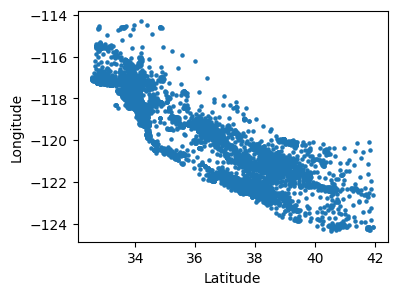

In [ ]:
# display the scatter plot of 'Latitude' vs 'Longitude'
data_df.plot.scatter(
    x = 'Latitude',
    y = 'Longitude',
    figsize = (4, 3),
    marker = '.'
)
plt.show()

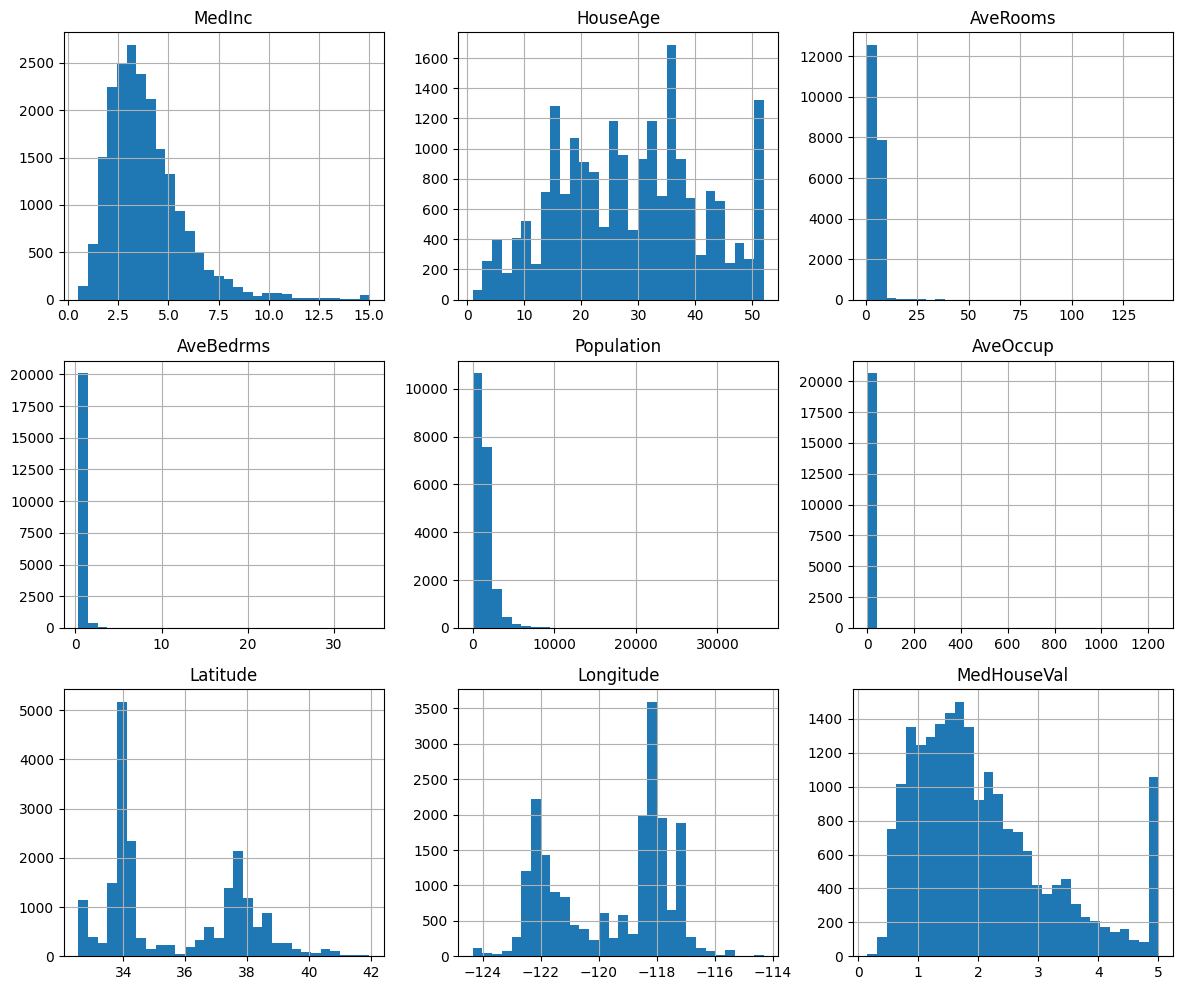

In [71]:
# Shows the histogram for all the numeric values in the data set.
data_df.hist(figsize=(12, 10),bins=30)

# Show the plot
plt.tight_layout() #Ensures the plots do not overlap and are neatly arranged.
plt.show()

- Seems to be different outliers in many features, therefore I'll use the box plot to verify that hypothesis

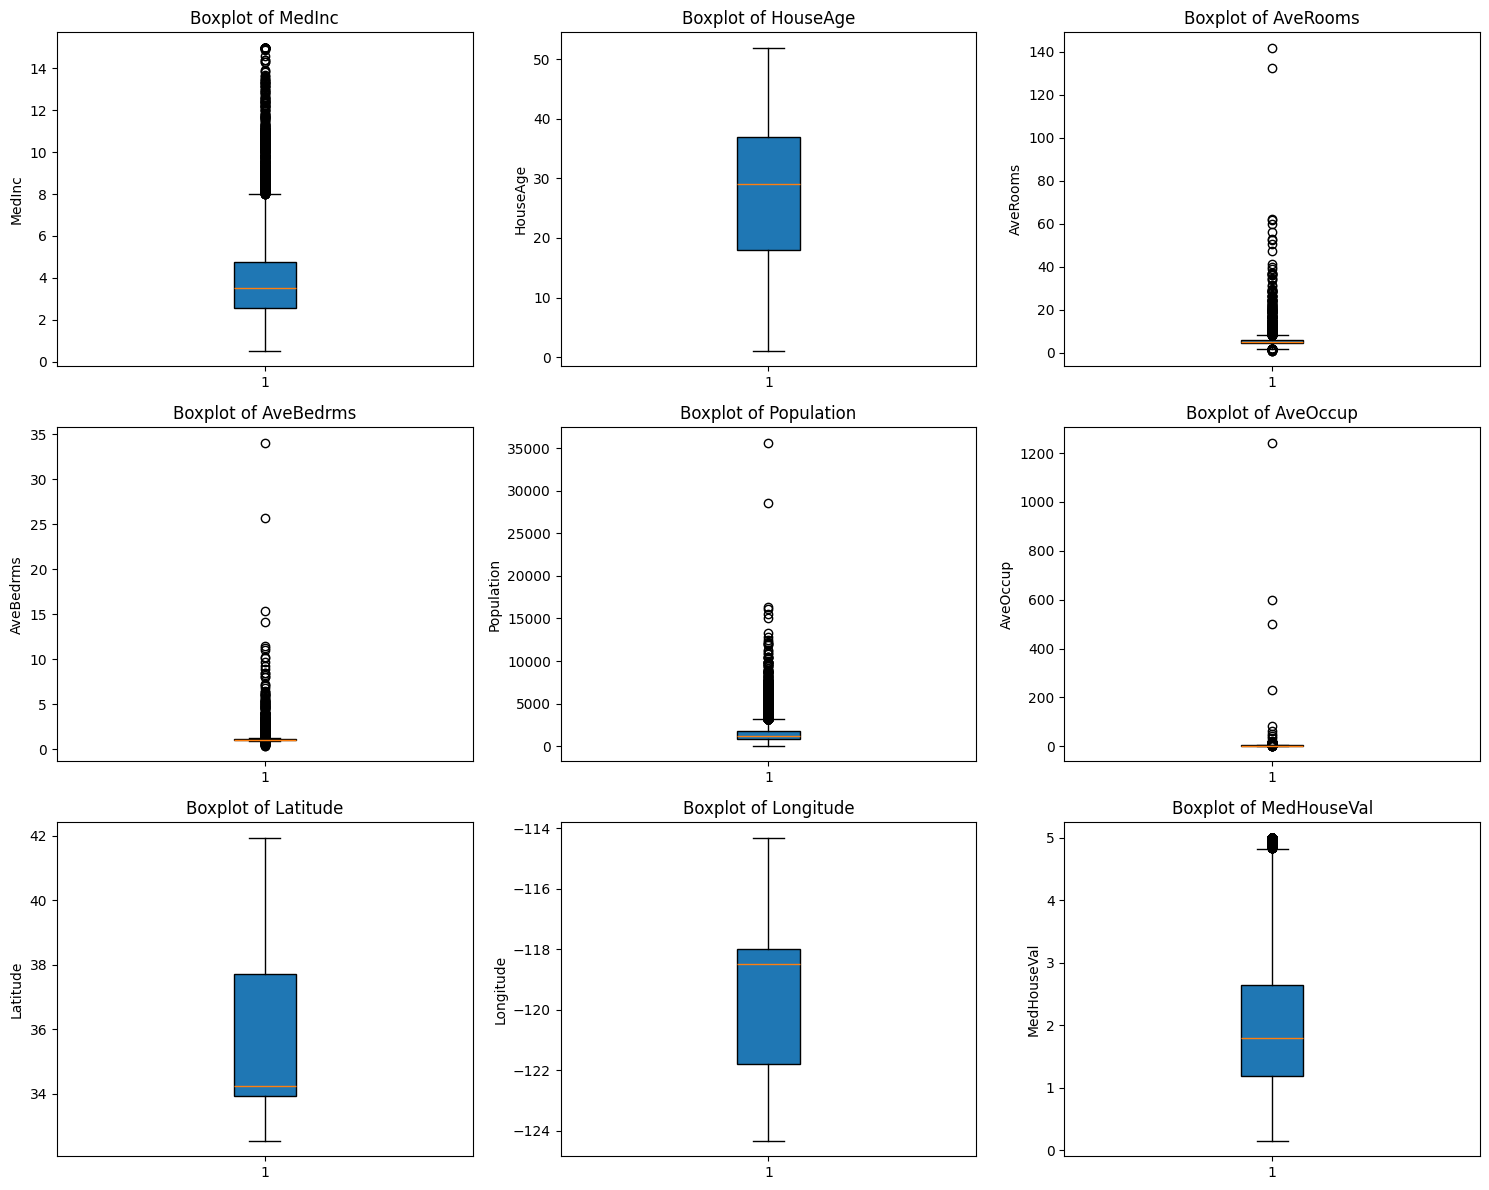

In [72]:
# Plot histograms for all numeric columns in one figure
numeric_columns = data_df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns in the figure
n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create a histogram
for idx, column in enumerate(numeric_columns):
    ax = axes[idx]
    ax.boxplot(data_df[column].dropna(), vert=True, patch_artist=True)
    ax.set_title(f"Boxplot of {column}")
    ax.set_ylabel(column)

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

- There is a huge amount of out-layers in the features MedInc, AveRooms, AveBedrms, Population, AveOccup and the limit in the MedHouseVal.

### Conclusion:
From this data exploration have been concluded to transform the data as follow:
1. Eliminate the limit barrier of 5 MedHouseVal.
2. Eliminate one of AveBedrms or AveRooms feature to avoid repetitive information.
3. Use Principal Component Analysis (PCA) to reduce dimensionality and avoid redundancy between Longitude and Latitude. Getting a better geographical feature for analysis.
4. Mitigate outliers of AveRooms/AveBedrms, Population, AveOccup.
5. Scale all features to run a better model.

### Task 2. Data preprocessing

<span style="color:red">**[TBC]**</span> Depending on the conclusions you got from data exploration, preproces the dataset.

#### 1. Eliminate the limit barrier of 5 MedHouseVal.

In [73]:
data_df = data_df[data_df['MedHouseVal'] < 5]
data_df['MedHouseVal'].describe()

count    19648.000000
mean         1.920553
std          0.971109
min          0.149990
25%          1.164750
50%          1.736000
75%          2.479000
max          4.991000
Name: MedHouseVal, dtype: float64

#### 2. Eliminate one of AveBedrms or AveRooms feature to avoid repetitive information.

In [74]:
data_df = data_df.drop(columns=['AveBedrms'])

#### 3. PCA between Longitude and Latitude

Using Principal Component Analysis (PCA) on Longitude and Latitude can enhance the clustering model by reducing redundancy and summarizing the spatial information into a single principal component. This improves clustering by reducing noise, simplifying relationships, and potentially improving computational efficiency.

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select Latitude and Longitude
spatial_features = data_df[['Latitude', 'Longitude']]

# Standardize the data
scaler = StandardScaler()
spatial_features_scaled = scaler.fit_transform(spatial_features)

# Apply PCA
pca = PCA(n_components=1)
spatial_component = pca.fit_transform(spatial_features_scaled)

# Add the PCA result back to the DataFrame
data_df['SpatialComponent'] = spatial_component

new_data_df = data_df.drop(columns=['Latitude', 'Longitude'])
new_data_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal,SpatialComponent
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,1.964800e+04
mean,3.676411,28.373066,5.361708,1441.368485,3.096560,1.920553,-2.314471e-17
std,1.570602,12.504050,2.293321,1144.075196,10.639195,0.971109,1.387169e+00
min,0.499900,1.000000,0.846154,3.000000,0.692308,0.149990,-3.705418e+00
25%,2.526300,18.000000,4.416667,796.000000,2.446614,1.164750,-1.497797e+00
50%,3.449050,28.000000,5.185730,1179.000000,2.837779,1.736000,8.204267e-01
75%,4.582500,37.000000,5.971083,1746.250000,3.306021,2.479000,1.113827e+00
max,15.000100,52.000000,132.533333,35682.000000,1243.333333,4.991000,2.705038e+00


##### Understanding the new SpatialComponent Feature.

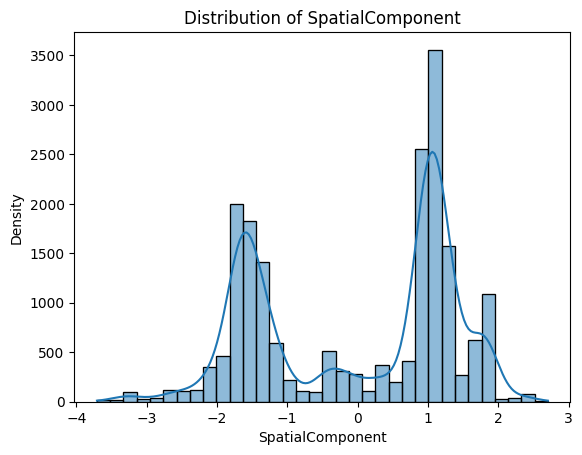

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(new_data_df['SpatialComponent'], kde=True)
plt.title('Distribution of SpatialComponent')
plt.xlabel('SpatialComponent')
plt.ylabel('Density')
plt.show()

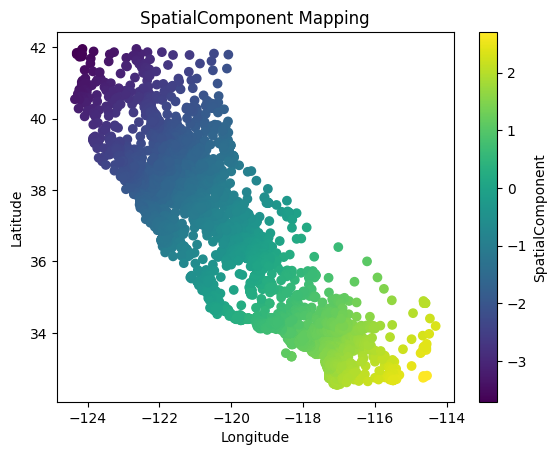

In [77]:
plt.scatter(data_df['Longitude'], data_df['Latitude'], c=data_df['SpatialComponent'], cmap='viridis', marker='o')
plt.colorbar(label='SpatialComponent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SpatialComponent Mapping')
plt.show()

- The colors (purple to yellow) represent the values of the SpatialComponent:
	
	- Purple/Lower Values: Likely correspond to locations in the northwest of California.
	- Yellow/Higher Values: Likely correspond to locations in the southeast of California.

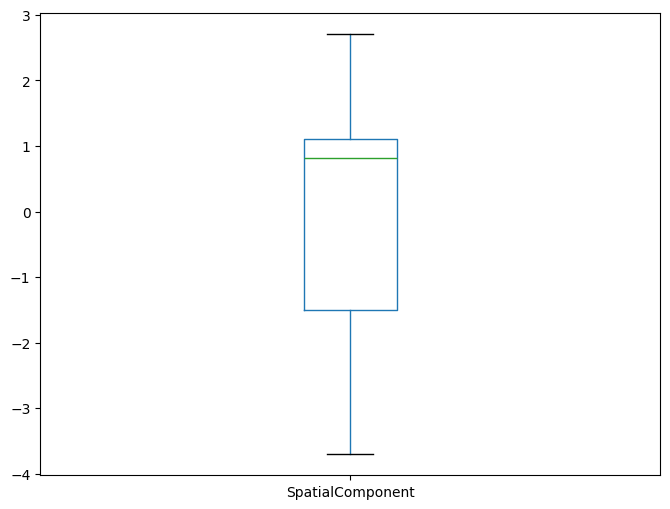

In [78]:
new_data_df.boxplot(
    column = ['SpatialComponent'],
    grid = False,
    figsize = (8, 6),
)
plt.show()

- There is more entries from the central-south of California

### 4. Mitigate outliers of AveRooms/AveBedrms, Population, AveOccup.

Outliers will be taken by the Z-score, this determine how far is a data point from its mean. Where the outliers typically have z-scores of > 3 or < -3.

In [79]:
from scipy.stats import zscore
zscore_df = data_df.copy()
zscore_df['ZScore_AveRooms'] = zscore(data_df['AveRooms'])
zscore_df['ZScore_Population'] = zscore(data_df['Population'])
zscore_df['ZScore_AveOccup'] = zscore(data_df['AveOccup'])

outliers = zscore_df[(abs(zscore_df['ZScore_AveRooms']) > 3) |
                   (abs(zscore_df['ZScore_Population']) > 3) |
                   (abs(zscore_df['ZScore_AveOccup']) > 3)]
print(outliers)

       MedInc  HouseAge  AveRooms  Population  AveOccup  Latitude  Longitude  \
283    5.9849      22.0  6.528724      4985.0  2.534316     37.79    -122.16   
570    7.6110       5.0  6.855776      7427.0  2.732524     37.72    -122.24   
576    7.2634      12.0  7.133034      5781.0  2.880419     37.77    -122.06   
780    3.8171      18.0  5.119733      5613.0  2.884378     37.63    -122.10   
799    2.5158      22.0  4.006152      5436.0  3.715653     37.64    -122.07   
...       ...       ...       ...         ...       ...       ...        ...   
20529  2.9605      12.0  4.915341      5633.0  2.634705     38.55    -121.78   
20530  3.1371      11.0  5.070223      7984.0  2.695476     38.57    -121.76   
20544  2.0650      23.0  4.803493      6330.0  3.455240     38.55    -121.76   
20563  3.1250       9.0  5.148007      6837.0  2.899491     38.67    -121.75   
20629  2.0943      28.0  5.519802      6912.0  3.801980     39.12    -121.39   

       MedHouseVal  SpatialComponent  Z

In [80]:
zscore_df = zscore_df[~((zscore_df['ZScore_AveRooms'] > 3) | 
                      (zscore_df['ZScore_Population'] > 3) | 
                      (zscore_df['ZScore_AveOccup'] > 3))]
zscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19183 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MedInc             19183 non-null  float64
 1   HouseAge           19183 non-null  float64
 2   AveRooms           19183 non-null  float64
 3   Population         19183 non-null  float64
 4   AveOccup           19183 non-null  float64
 5   Latitude           19183 non-null  float64
 6   Longitude          19183 non-null  float64
 7   MedHouseVal        19183 non-null  float64
 8   SpatialComponent   19183 non-null  float64
 9   ZScore_AveRooms    19183 non-null  float64
 10  ZScore_Population  19183 non-null  float64
 11  ZScore_AveOccup    19183 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [81]:
# Verifying that the outliers where dropped.
outliers = zscore_df[(abs(zscore_df['ZScore_AveRooms']) > 3) |
                   (abs(zscore_df['ZScore_Population']) > 3) |
                   (abs(zscore_df['ZScore_AveOccup']) > 3)]
print(outliers)

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, Population, AveOccup, Latitude, Longitude, MedHouseVal, SpatialComponent, ZScore_AveRooms, ZScore_Population, ZScore_AveOccup]
Index: []


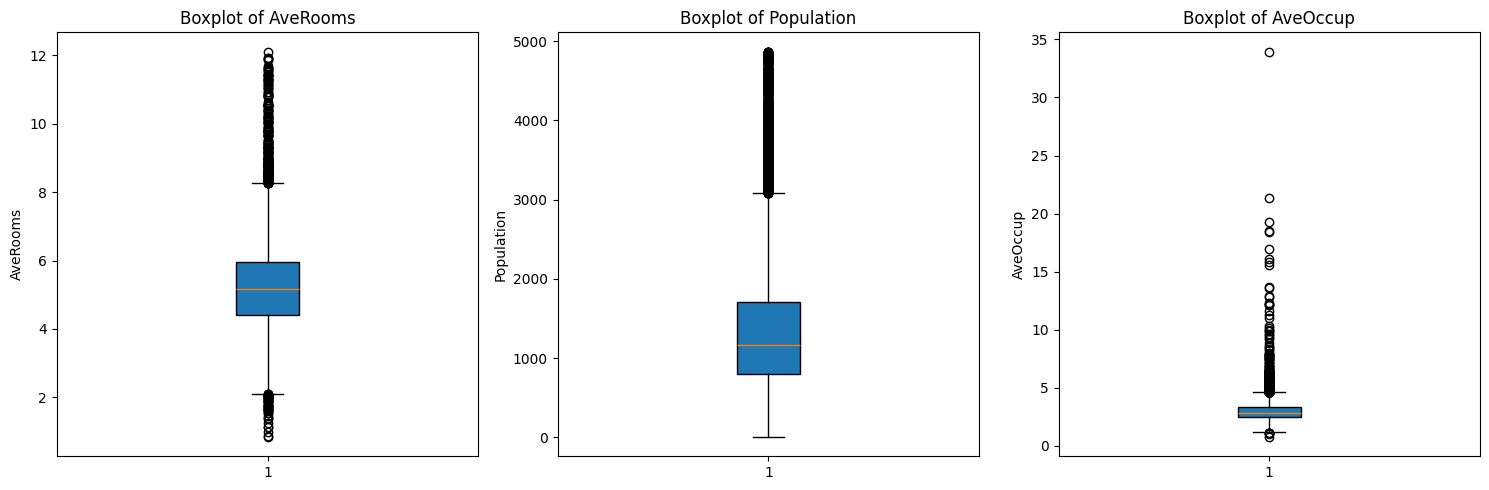

In [82]:
# List of columns to include in the box plot
columns_to_plot = ['AveRooms', 'Population', 'AveOccup']

# Create a subplot for each column
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))  # 1 row, 3 columns

# Plot each column in its own subplot
for idx, column in enumerate(columns_to_plot):
    axes[idx].boxplot(zscore_df[column].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot of {column}')
    axes[idx].set_ylabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

As there is still many outliers for many features (Specially for AveOccup) the depuration will be done by the IQR due to it is more robust for skewed data.

In [84]:
# Define a function to perform IQR-based filtering
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outlier detection
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outlier detection

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the columns to check for outliers
columns_to_check = ['AveRooms', 'Population', 'AveOccup']

# Apply the IQR method
cleaned_df = remove_outliers_iqr(data_df, columns_to_check)

# Display the cleaned DataFrame
cleaned_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,SpatialComponent
count,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000
mean,3.674751,29.184955,5.210778,1246.365682,2.854780,35.701412,-119.632119,1.934944,-0.040880
std,1.542337,12.303637,1.086014,638.691279,0.626068,2.161491,2.014316,0.981377,1.395110
min,0.499900,1.000000,2.090426,5.000000,1.169329,32.540000,-124.350000,0.149990,-3.705418
25%,2.536900,19.000000,4.446940,785.000000,2.426449,33.940000,-121.830000,1.153500,-1.544971
50%,3.460900,30.000000,5.184049,1137.000000,2.802299,34.400000,-118.670000,1.760000,0.725357
75%,4.583300,37.000000,5.934323,1613.000000,3.235808,37.740000,-118.030000,2.511000,1.104191
max,13.147700,52.000000,8.297101,3173.000000,4.567164,41.950000,-114.550000,4.991000,2.705038


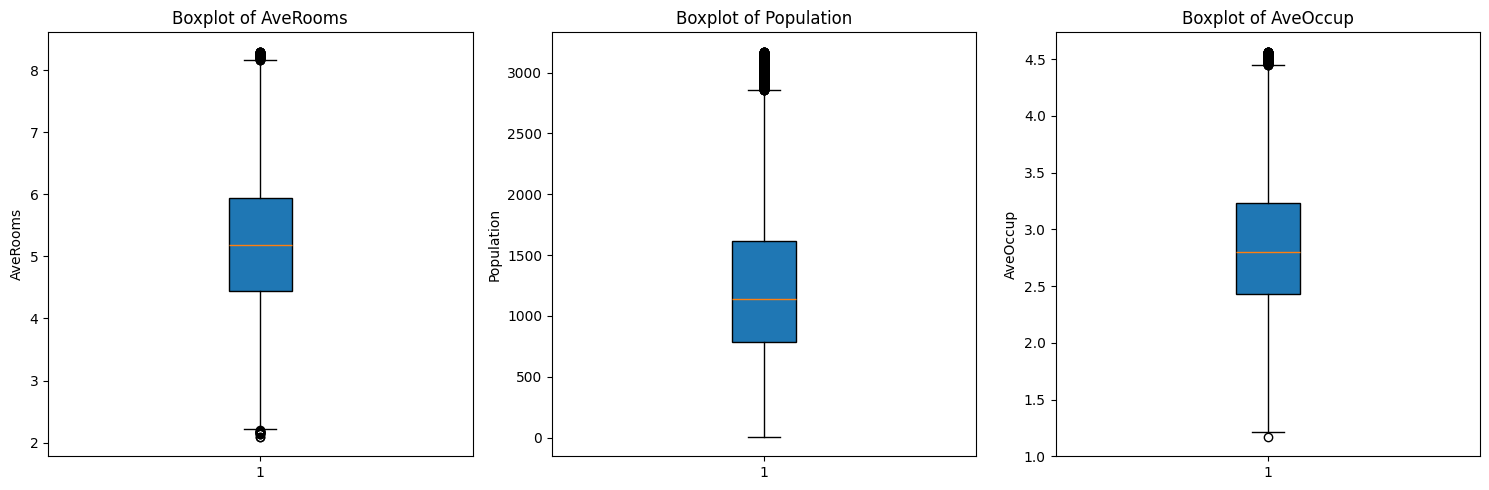

In [85]:
# List of columns to include in the box plot
columns_to_plot = ['AveRooms', 'Population', 'AveOccup']

# Create a subplot for each column
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(15, 5))  # 1 row, 3 columns

# Plot each column in its own subplot
for idx, column in enumerate(columns_to_plot):
    axes[idx].boxplot(cleaned_df[column].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(f'Boxplot of {column}')
    axes[idx].set_ylabel(column)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

By doing the depuration the number of entries went from 20.640 to 19.183 by the Zscore cleaning and to 17.507 due to the IQR-based filtering

### 5. Scale all features so there is no single feature dominates clustering due to its magnitude.

In [86]:
cleaned_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal', 'SpatialComponent'],
      dtype='object')

In [87]:
#Latitude and longitude are being drop as they are in the SpatialComponent Feature
cleaned_df = cleaned_df.drop(columns=['Latitude','Longitude'])
cleaned_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal,SpatialComponent
count,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000,17507.000000
mean,3.674751,29.184955,5.210778,1246.365682,2.854780,1.934944,-0.040880
std,1.542337,12.303637,1.086014,638.691279,0.626068,0.981377,1.395110
min,0.499900,1.000000,2.090426,5.000000,1.169329,0.149990,-3.705418
25%,2.536900,19.000000,4.446940,785.000000,2.426449,1.153500,-1.544971
50%,3.460900,30.000000,5.184049,1137.000000,2.802299,1.760000,0.725357
75%,4.583300,37.000000,5.934323,1613.000000,3.235808,2.511000,1.104191
max,13.147700,52.000000,8.297101,3173.000000,4.567164,4.991000,2.705038


In [88]:
from sklearn.preprocessing import StandardScaler

# Select the column to exclude (e.g., 'SpatialComponent')
excluded_feature = 'SpatialComponent'

# Separate the features to scale and the excluded feature
features_to_scale = cleaned_df.drop(columns=[excluded_feature])
excluded_data = cleaned_df[[excluded_feature]]

# Scale the features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=cleaned_df.index)

# Add the excluded feature back to the DataFrame
final_df = pd.concat([scaled_df, excluded_data], axis=1)

# Display the result
final_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal,SpatialComponent
count,1.750700e+04,1.750700e+04,1.750700e+04,1.750700e+04,1.750700e+04,1.750700e+04,17507.000000
mean,1.298759e-17,-7.792552e-17,-4.545655e-17,-9.578345e-17,2.873503e-16,6.493793e-17,-0.040880
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.395110
min,-2.058527e+00,-2.290848e+00,-2.873297e+00,-1.943664e+00,-2.692197e+00,-1.818879e+00,-3.705418
25%,-7.377660e-01,-8.278240e-01,-7.033609e-01,-7.223816e-01,-6.841804e-01,-7.962964e-01,-1.544971
50%,-1.386579e-01,6.624616e-02,-2.461274e-02,-1.712389e-01,-8.382868e-02,-1.782693e-01,0.725357
75%,5.890899e-01,6.351999e-01,6.662576e-01,5.740564e-01,6.086221e-01,5.870042e-01,1.104191
max,6.142122e+00,1.854386e+00,2.841962e+00,3.016621e+00,2.735219e+00,3.114139e+00,2.705038


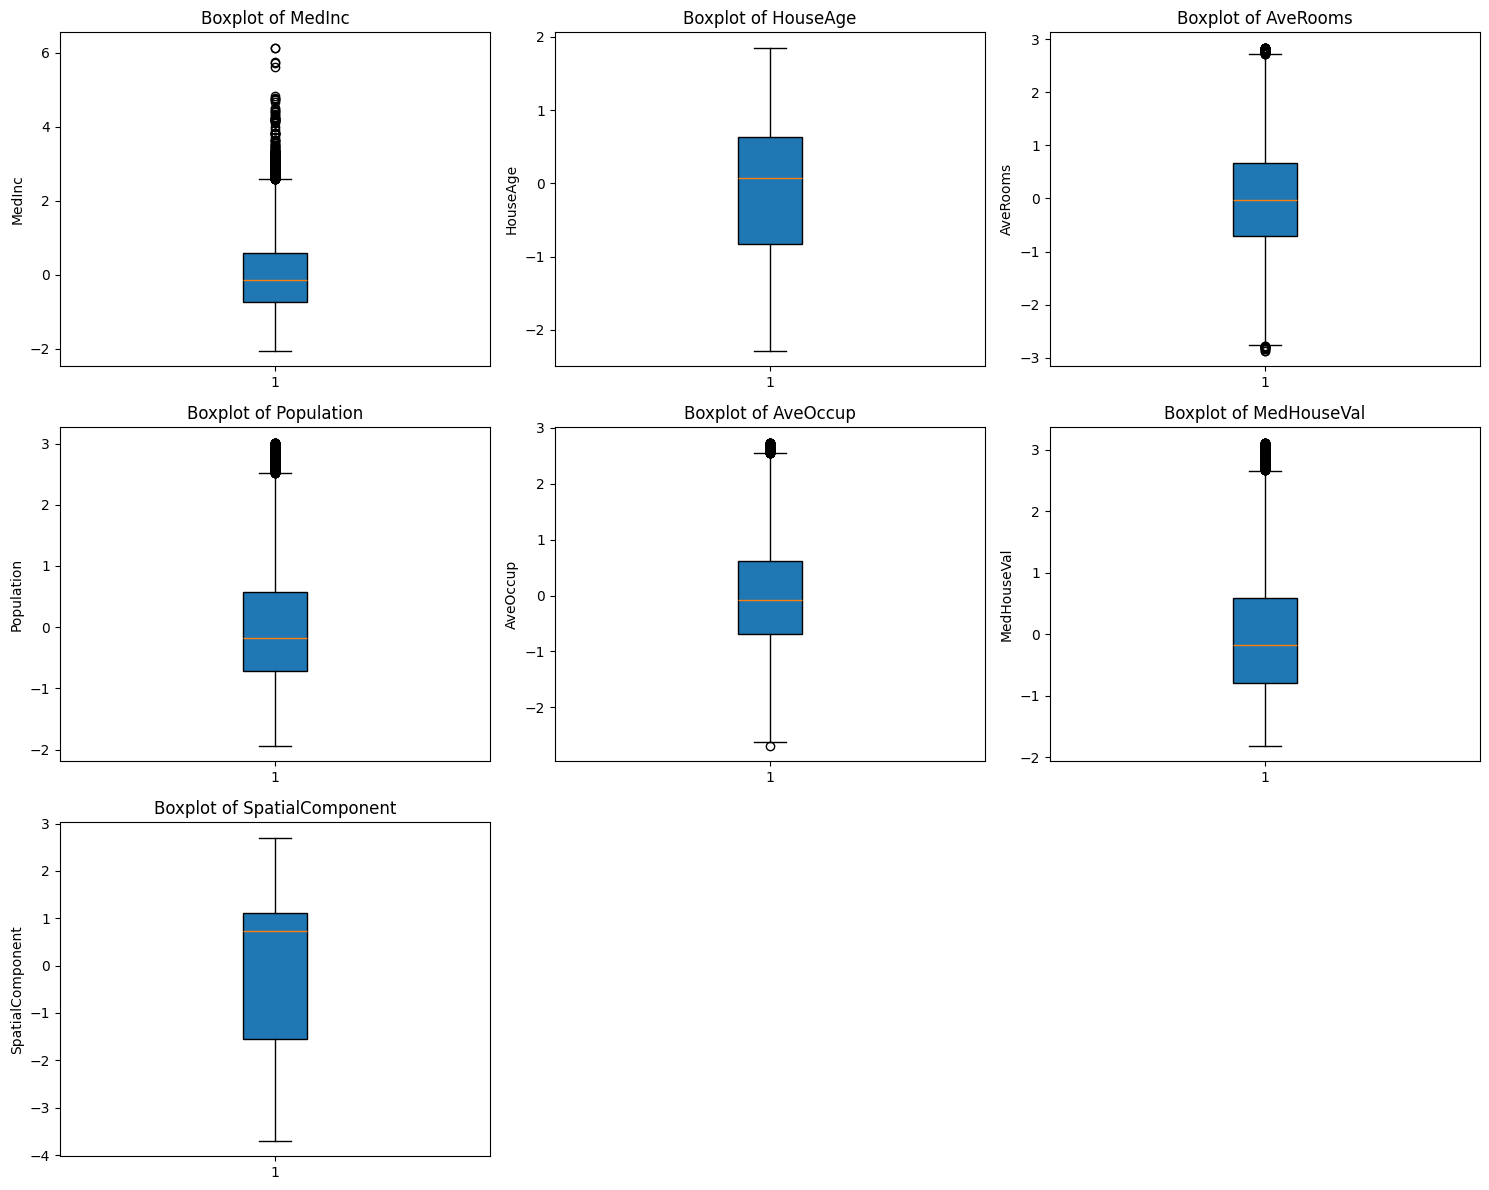

In [54]:
# Plot histograms for all numeric columns in one figure
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Define the number of rows and columns for subplots
n_cols = 3  # Number of columns in the figure
n_rows = -(-len(numeric_columns) // n_cols)  # Ceiling division to determine rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create a histogram
for idx, column in enumerate(numeric_columns):
    ax = axes[idx]
    ax.boxplot(final_df[column].dropna(), vert=True, patch_artist=True)
    ax.set_title(f"Boxplot of {column}")
    ax.set_ylabel(column)

# Hide any unused subplots
for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [89]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17507 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            17507 non-null  float64
 1   HouseAge          17507 non-null  float64
 2   AveRooms          17507 non-null  float64
 3   Population        17507 non-null  float64
 4   AveOccup          17507 non-null  float64
 5   MedHouseVal       17507 non-null  float64
 6   SpatialComponent  17507 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


### Task 3. K-Means clustering

<span style="color:red">**[TBC]**</span> Perform K-Means clustering with the pre-processed dataset. Select the value of K through the elbow method.

And the end we finished with 7 features:
1. MedInc 
2. HouseAge
3. AveRooms
4. AveOccup_Sqrt
5. MedHouseVal
6. SpatialComponent
7. Population_Scaled

In [90]:
# K-Means clustering
X = final_df.values
model = KMeans(
    n_clusters = 10, # 10 clusters
    n_init = 'auto', # multiple attempt with different initial centroids
    random_state = 1, # fix ramdom state to guarantee reproducibility
    verbose = 1 # output log
)
model.fit(X)

Initialization complete
Iteration 0, inertia 77043.11617632076.
Iteration 1, inertia 61521.53849667721.
Iteration 2, inertia 59945.82005714185.
Iteration 3, inertia 59420.36136935333.
Iteration 4, inertia 59196.96010738484.
Iteration 5, inertia 59034.9323864164.
Iteration 6, inertia 58888.19433912056.
Iteration 7, inertia 58738.93198212122.
Iteration 8, inertia 58619.447598195715.
Iteration 9, inertia 58515.530629447836.
Iteration 10, inertia 58436.63893687296.
Iteration 11, inertia 58359.18488246912.
Iteration 12, inertia 58293.685182637.
Iteration 13, inertia 58243.053303332585.
Iteration 14, inertia 58195.33508300666.
Iteration 15, inertia 58142.55960609413.
Iteration 16, inertia 58089.9531229163.
Iteration 17, inertia 58039.30194932333.
Iteration 18, inertia 57988.71289298362.
Iteration 19, inertia 57930.58751029776.
Iteration 20, inertia 57877.9215448859.
Iteration 21, inertia 57824.545014053016.
Iteration 22, inertia 57775.686200691634.
Iteration 23, inertia 57729.7553640347.
Ite

KMeans(n_clusters=10, random_state=1, verbose=1)

In [91]:
# obtain the cluster centers
model.cluster_centers_

array([[-0.59150978, -0.49803635, -0.87465103, -0.32992722, -1.02107566,
        -0.18073743,  1.22477959],
       [-0.39300509,  1.24483316, -0.41155617, -0.48745342, -0.52919088,
         0.04664167, -1.60835617],
       [ 1.5798701 , -0.81014979,  1.39791047,  0.14758525,  0.29861665,
         0.83293749,  1.14232478],
       [-0.15405552, -0.71817387, -0.23023101,  1.51613874,  0.17064889,
        -0.20808483,  1.21385187],
       [ 1.37720457, -0.13653032,  1.09635982, -0.26659255, -0.11730305,
         1.20013944, -1.53347152],
       [ 0.05670628, -0.80717908,  0.08372108,  1.21409799,  0.01512354,
        -0.17967892, -1.40560106],
       [ 0.62587023,  0.71626896,  0.06455924, -0.42892625, -0.79492357,
         1.62383793,  1.01224463],
       [-0.57489285, -0.4637547 ,  0.16776437, -0.58393632, -0.23319841,
        -0.84397304, -1.51867073],
       [-0.88158589,  0.45644905, -0.95395274,  0.31544116,  1.54528633,
        -0.69729092,  0.84347172],
       [ 0.05089809,  0.5927

In [92]:
# obtain the inertia
model.inertia_

57049.56383030149

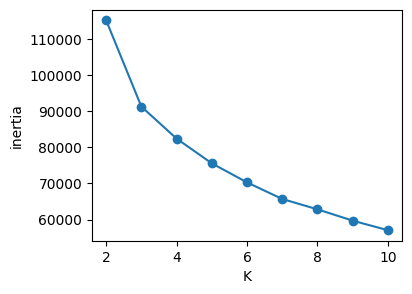

In [93]:
# create an empty list to store inertia
inertia =[]

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    inertia.append(model.inertia_)

# plot k vs inertia
plt.figure(figsize = (4, 3))
plt.plot(range(2, 11), inertia, marker = 'o')
plt.xlabel('K')
plt.ylabel('inertia')
plt.show()

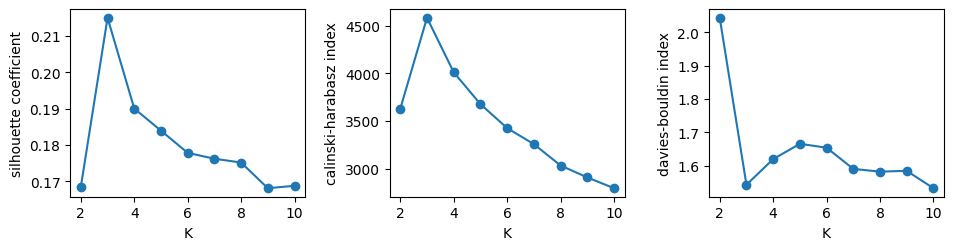

In [94]:
# create an empty list to store silhouette coefficient
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different k values
for k in range(2, 11):
    model = KMeans(
        n_clusters = k,
        n_init = 'auto',
        random_state = 1,
        verbose = 0
    ).fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model.labels_))

# plot k vs silhouette coefficient
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 3))
fig.tight_layout(pad = 3)
axs[0].plot(range(2, 11), silhouette, marker = 'o')
axs[0].set_xlabel('K')
axs[0].set_ylabel('silhouette coefficient')
axs[1].plot(range(2, 11), calinski_harabasz, marker = 'o')
axs[1].set_xlabel('K')
axs[1].set_ylabel('calinski-harabasz index')
axs[2].plot(range(2, 11), davies_bouldin, marker = 'o')
axs[2].set_xlabel('K')
axs[2].set_ylabel('davies-bouldin index')
plt.show()

In [95]:
# reconstruct the clustering model with k=3
model = KMeans(
    n_clusters = 3,
    n_init = 'auto',
    random_state = 1,
    verbose = 1
)
model.fit(X)

Initialization complete
Iteration 0, inertia 175468.33495333086.
Iteration 1, inertia 100813.56950573984.
Iteration 2, inertia 95158.33134323021.
Iteration 3, inertia 94148.17271606336.
Iteration 4, inertia 93709.28520942842.
Iteration 5, inertia 93448.62725163825.
Iteration 6, inertia 93245.8922004445.
Iteration 7, inertia 93067.60122652503.
Iteration 8, inertia 92852.02070230052.
Iteration 9, inertia 92613.137561063.
Iteration 10, inertia 92364.07873682103.
Iteration 11, inertia 92082.1027404937.
Iteration 12, inertia 91827.7618850867.
Iteration 13, inertia 91634.10622017883.
Iteration 14, inertia 91512.85771593952.
Iteration 15, inertia 91434.25339995205.
Iteration 16, inertia 91384.98848342465.
Iteration 17, inertia 91350.74532179849.
Iteration 18, inertia 91331.75364774404.
Iteration 19, inertia 91319.16073117127.
Iteration 20, inertia 91310.52646902003.
Iteration 21, inertia 91305.64146158061.
Iteration 22, inertia 91303.06630729427.
Iteration 23, inertia 91301.15367883409.
Itera

KMeans(n_clusters=3, random_state=1, verbose=1)

In [96]:
model.inertia_

91299.65818720171

### Task 4. Interpret clustering results

<span style="color:red">**[TBC]**</span> Try to interpret the clustering results. Please describe the characteristics of the clusters you've got and which type of districts each cluster represent.

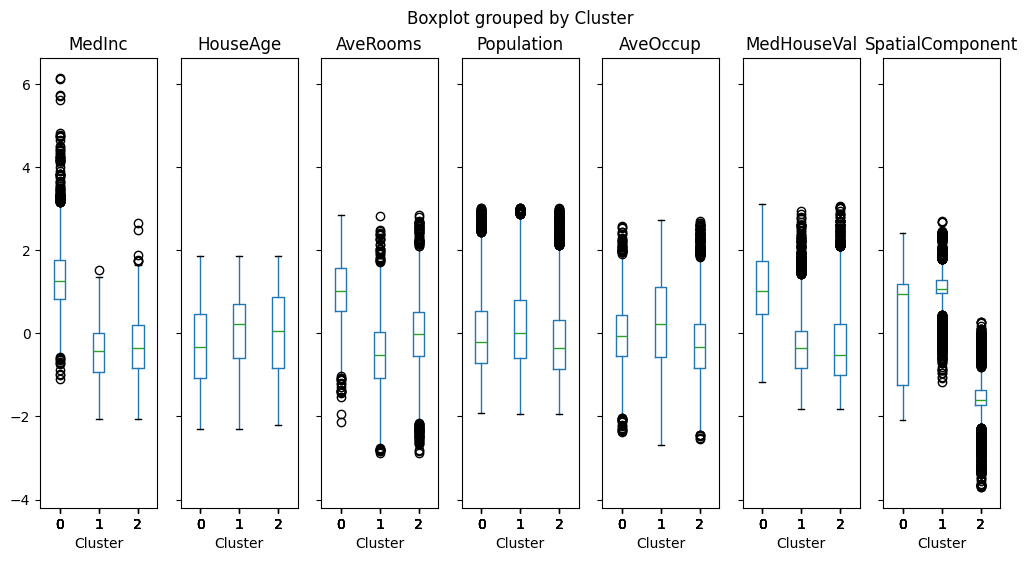

In [97]:
# display the boxplot by cluster
labeled_df = final_df.copy()
labeled_df['Cluster'] = model.labels_
labeled_df.boxplot(
    column = ['MedInc', 'HouseAge', 'AveRooms', 'Population','AveOccup',
       'MedHouseVal', 'SpatialComponent'],
    by = 'Cluster',
    grid = False,
    figsize = (12, 6),
    layout = (1, 7)
)
plt.show()

Spatial Component Analysis:
- Higher correspond to locations in the southeast of California
- Lower correspond to locations in the northwest of California

### Cluster Analysis

Cluster 0:

1. MedInc (Median Income):
    - This cluster has the highest median income compared to the others, with most values above the overall mean.
    -	Indicates this cluster represents the most affluent group.

2.	HouseAge:
    -	The houses are newer, with the lowest median house age across the clusters.
    -	This suggests recent development or newer neighborhoods.

3.	AveRooms:
    -	This cluster has the highest average number of rooms per household, indicating larger homes.

4.	Population:
    -	The population is moderate, showing neither extremely high nor low values compared to other clusters.

5.	AveOccup:
    -	Average occupancy is balanced, showing no overcrowding in homes.

6.	MedHouseVal (Median House Value):
    -	This cluster has the highest house values, consistent with higher income and larger homes.

7.	SpatialComponent:
    -	Geographically, this cluster is concentrated in regions with positive spatial values, with  wide area of spread, being the average of the cluster closer to Los Angeles (Southwest of California).


Cluster 1:

1.	MedInc:
	-	This cluster has the lowest median income, indicating less affluent households.
	
2.	HouseAge:
	-	Houses in this cluster are older, with the highest median age among the clusters.

3.	AveRooms:
	-	Average rooms per household are the lowest, suggesting smaller homes.

4.	Population:
	-	The population is slightly higher than average, indicating denser areas or more crowded living conditions.

5.	AveOccup:
	-	Average occupancy is higher, suggesting more crowded homes compared to the other clusters.

6.	MedHouseVal:
	-	This cluster a medium house values, consistent with lower income and potentially older, less desirable housing.

7.	SpatialComponent:
    - 	Geographically, this cluster is highly concentrated in the south area of the state, also closer to los Angeles and surroundings.

Cluster 2:

1.	MedInc:
	-	This cluster has a slightly higher moderate median income than cluster 1, representing middle-income households.

2.	HouseAge:
	-	Houses in this cluster are a mix of old and new, with median house age between Clusters 0 and 1.

3.	AveRooms:
	-	Average rooms are balanced, a lot smaller than Cluster 0 but larger than Cluster 1.

4.	Population:
	-	The population is moderate, showing balanced density compared to other clusters.

5.	AveOccup:
	-	Occupancy is the lowest, showing no overcrowding issues.

6.	MedHouseVal:
	-	House values are low but wider, suggesting middle-income households.

7.	SpatialComponent:
	-	Geographically, this cluster occupies areas more to the northwest region of the state, closer to San Francisco.

Summery

-	Cluster 0: High-income group with new, large houses in affluent areas in the center-south region, closer to los angeles.
-	Cluster 1: Low-income group with older houses in dense, low-value regions in the south.
-	Cluster 2: Middle-income group with balanced characteristics and tended towards north regions, closer to San Francisco.
